# Movie Data Analysis

## Introduction

The following work serves to analyse the data of more than 10,000 movies. The first part of this project will focus on data wrangling to clean up the data and subsequently perform an analysis with the cleaned up data. The second analysis will focus on studying different trends and correlations so that tentative conclusions can be made. Assumptions will clearly be stated and by no means are the conclusions of this work definitive but more so speculative as no rigorous statistical analysis will be performed. The project will present tentative relations between different sets of data and the reader is encouraged to use their own critical approach to these conclusions

1. What genre of movie is popular year to year?
    - Has there been more votes in recent years compared to early years?
    - Does the level of popularity change over time?
    - Is there a relationship between vote count and popularity?
    - Does a movie that's more popular mean a better average vote for a given movie?
2. How does "money" interact with various parameters?
    - Are movies with higher budgets more popular? 
    - Does a higher budget mean higher revenue? Does more popularity mean more revenue?
    - Do higher budget command better ROIs? Do popular movie command better ROIs?
    - Which movie genres have the highest/lowest budget/revenue?
    - Which movie genres have the best "return on investment" or ROI?
    - Impact of grouped popularity and budget on ROI?
3. Which production company produces the most movies?
    - With grouped production companies, is there a correlation between average vote and popularity?
    - With grouped production companies, is there a correlation between popularity / average vote and ROI?
    - Which production companies have the biggest budget/ROI? 
    - Which production companies have the best ROI?
4. Do certain Directors command higher budgets?


## Data Wrangling

The first step to any projects of this sort is to import two main libraries irrespective if they are used or not which are _numpy_ and _pandas_. Additional libraries will be added as per need.

In [1]:
# Import numpy should we use numpy related built-in functions. np is the common abbreviation
import numpy as np

# Import pandas should we use pandas related built-in functions. pd is the common abbreviation
import pandas as pd

This project should probably also import the file that contains all the data. For ease and convenience due to the nature of this work, the project will be imported in a Dataframe format.

In [182]:
# Import the tmdb-movies.csv file in a pandas dataframe and read only pd

movie_data_base_df=pd.DataFrame.from_csv('/users/modafro/tmdb-movies.csv')

In [183]:
print ("The original data has a total of {} movies. One should expect this number to be reduced after the data wrangling".format(len(movie_data_base_df)))

The original data has a total of 10866 movies. One should expect this number to be reduced after the data wrangling


The first step is to lighten the data. For the purpose of our analysis, the following data will not be utilized:
- tagline
- keywords
- homepage
- overview

The other columns that won't be needed are the __budget__ and __revenue__ columns. The assumption made is that the adjusted budget and revenue data to account for inflation are much more relevant for comparison purposes between different movies of different release dates. It allows comparison to be made on the _same level playing field_. This is not to say that the data deleted can't be used for meaningful analysis, it simply won't be used in this project.

The wrangling will also ascertain that there are no duplicate values in the dataframe.

In [184]:
#Verify duplicates in Dataframe

movie_data_base_df[movie_data_base_df.duplicated(keep=False)]

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


As shown in the table above, TEKKEN movie appears twice in the table so one of the two entries will be removed from the dataframe.

In [185]:
# drop one duplicated row

movie_data_base_dfDup=movie_data_base_df.drop_duplicates(subset=['imdb_id','popularity'])                                                     

In [186]:
# Define a function to delete unwanted columns from a given dataframe that takes in a dataframe and a string or list of strings 
# of the columns to be deleted as inputs and returns a dataframe without these columns

def delete_columns(data_frame, deleted_column):
    lighter_df=data_frame.drop(deleted_column, axis=1)
    return lighter_df

In [187]:
# Apply delete_columns function to delete unwanted columns

movie_data_base_dfLighters=delete_columns(movie_data_base_dfDup, ['budget', 'revenue','homepage','tagline','keywords','overview'])

Next, any numerical data that has a value of 0 will entrain the row containing 0 to be deleted. The assumption is that a 0 in such data will be regarded as unreliable data and the requirement for our analysis is that we have a full picture devoid of any discrepancies. One could argue that a revenue of 0 is possible however, the assumption is that the revenue values are net values (i.e.: after all expenses are deducted) and one can reasonably assume that an absolute value of exactly 0 is highly improbable. 

In [188]:
# Deletion of rows that have a value of zero in any columns with numbers
movie_data_base_dfLighter=movie_data_base_dfLighters[(movie_data_base_dfLighters[['runtime','budget_adj',
                                                                                  'revenue_adj']] != 0).all(axis=1)]

Another verification that is required with such a large data is to ascertain that there are no "empty" cells. Any empty cells will be replaced by a string to ease potential error messages further into our analysis.

In [189]:
# define a function that takes in a dataframe as argument and replace empty cells with the string "No Data"

def replace_EmptyWithNoData(data_emptycells):
    data_filledWithNoData=data_emptycells.fillna("No Data")
    return data_filledWithNoData


In [190]:
# Apply function on latest dataframe

movie_data_base_dfClean=replace_EmptyWithNoData(movie_data_base_dfLighter)

A few columns have pipe characters (|) such as _cast_ or _production companies_. In order for analysis to be made on these columns, we will remove these pipe characters to create a list of strings within those columns.

In [191]:
# create a dataframe with columns that contain pipe characters.

pipe_characters_df=movie_data_base_dfClean.filter(['director','cast', 'genres','production_companies'], axis=1) 

In [192]:
# Define a function to separate the pipe characters that takes in a string with pipe characters as an argument and 
# returns a series of string (pipe characters separated)

def split_pipe(movie_data):
    words_splited=movie_data.split("|")
    return words_splited

# write a function to apply the split_pipe function on the dataframe that contains all the columns with pipe characters:

def split_pipes(movie_datas):
    return movie_datas.applymap(split_pipe)

In [193]:
# Apply split_pipes on pipe character dataframe

pipe_characters_dfSplit=split_pipes(pipe_characters_df)

print ("Sample of the dataframe with split characters removed:")
pipe_characters_dfSplit.head()

Sample of the dataframe with split characters removed:


,director,cast,genres,production_companies
id,,,,
135397,[Colin Trevorrow],"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...","[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege..."
76341,[George Miller],"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...","[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro..."
262500,[Robert Schwentke],"[Shailene Woodley, Theo James, Kate Winslet, A...","[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W..."
140607,[J.J. Abrams],"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...","[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]"
168259,[James Wan],"[Vin Diesel, Paul Walker, Jason Statham, Miche...","[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ..."


As it can be observed in the above dataframe, there can be multiple strings under a given column for a given movie. To simplify the dataframe for analysis purposes, a dataframe containing one single "dominant" string, which will be the first string within a series, will be created. As an example, for id 135397,
- the cast [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...] will become [Chris Pratt] which is the first string of the list 
- the genres [Action, Adventure, Science Fiction, Thriller] will become [Action]
- etc.

In [194]:
# define a function that takes a list of strings as its argument and returns the first string of that list

def dominant_value(list_value):
    return list_value[0]

# define a function to apply dominant_value to a dataframe

def dominant_values(list_values):
    return list_values.applymap(dominant_value)

In [195]:
# Apply dominant_values on the pipe character dataframe

dominant_value_df=dominant_values(pipe_characters_dfSplit)

print ("Sample of dataframe with dominant strings only: ")
dominant_value_df.head()

Sample of dataframe with dominant strings only: 


,director,cast,genres,production_companies
id,,,,
135397,Colin Trevorrow,Chris Pratt,Action,Universal Studios
76341,George Miller,Tom Hardy,Action,Village Roadshow Pictures
262500,Robert Schwentke,Shailene Woodley,Adventure,Summit Entertainment
140607,J.J. Abrams,Harrison Ford,Action,Lucasfilm
168259,James Wan,Vin Diesel,Action,Universal Pictures


In the Introduction section, we mentioned return on investment or ROI. It's a metric that measures the true value of profitability for a given movie and is defined as follows as per our assumptions:

$$ROI(\%)=\frac{profits-budget}{budget}\times100$$

<center>where $revenue=profits-budget$</center>

In [196]:
# define a function a function to calculate ROI

def return_investment(investment, revenue):
    ROI=revenue/investment*100
    return ROI

In [197]:
# remove the director, cast, genres, and production companies columns from dfClean and replace them with the dominant_df columns
movie_data_base_delete=delete_columns(movie_data_base_dfClean, ['director','cast','genres','production_companies'])

# merge the latest dataframe (delete) with the dominant_df dataframe
movie_data_base_dfMerge=pd.concat([movie_data_base_delete.reset_index(drop=True), dominant_value_df.reset_index(drop=True)], axis=1)

# add ROI column to the merged dataframe
movie_data_base_dfMerge['ROI(%)']=return_investment(movie_data_base_dfMerge.loc[:,'budget_adj'], movie_data_base_dfMerge.loc[:,'revenue_adj'])

print("Sample of how the dataframe looks like thus far:")
movie_data_base_dfMerge.head()

Sample of how the dataframe looks like thus far:


,imdb_id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,director,cast,genres,production_companies,ROI(%)
0,tt0369610,32.985763,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Colin Trevorrow,Chris Pratt,Action,Universal Studios,1009.019207
1,tt1392190,28.419936,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,George Miller,Tom Hardy,Action,Village Roadshow Pictures,252.290903
2,tt2908446,13.112507,Insurgent,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Robert Schwentke,Shailene Woodley,Adventure,Summit Entertainment,268.398365
3,tt2488496,11.173104,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,J.J. Abrams,Harrison Ford,Action,Lucasfilm,1034.089113
4,tt2820852,9.335014,Furious 7,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,James Wan,Vin Diesel,Action,Universal Pictures,792.762821


We previously replaced all blank values with "No Data". In the spirit of consistency based on this project's approach, any movie that has a "No Data" value will be viewed as imcomplete data and therefore not admissible for the analysis portion. 

In [198]:
# define a function to remove rows that contain "No Data" which will take in as argument a dataframe and a string or list of
# strings as arguments and returns the dataframe without the rows containing "No Data"

def removing_NoData(nodata_df, column_head):
    for head in column_head:
        NoData_Dataframe=nodata_df[nodata_df[head].str.contains("No Data")==False]
    return NoData_Dataframe

NoData_df=removing_NoData(movie_data_base_dfMerge, ['director','cast','genres','production_companies'])

The last phase of the data wrangling is to establish minimum values for some of the data that will be considered for our analysis. These are _personal_ preferences and not official guidelines:
- runtime: minimum 2 min
- vote_count: minimum 10 counts
- budget_adj: minimum \$10,000


In [199]:
# define function a function that takes as arguments a dataframe, a string and a minimum number (integer or float) and returns 
# the dataframe containing data with values respecting the boolean setting

def set_minimum(MinData_df, Head, MinValue):
    Data_Min=MinData_df[MinData_df[Head]>MinValue]
    return Data_Min

In [200]:
# apply set_minimum function on latest dataframe

min_runtime_df=set_minimum(NoData_df, 'runtime', 2)
min_votecount_df=set_minimum(min_runtime_df, 'vote_count',10)
min_budgetadj_df=set_minimum(min_votecount_df,'budget_adj', 10000)

The data wrangling phase is now complete. A neat name will be assigned to the final dataframe and proceed to the analysis phase of the project.

In [201]:
#let's assign a neat dataframe name for what will be used in the analysis
movie_database_analysis_df=min_budgetadj_df

print ("Sample of the dataframe set the analysis will be done for:")
movie_database_analysis_df.head()

Sample of the dataframe set the analysis will be done for:


,imdb_id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,director,cast,genres,production_companies,ROI(%)
0,tt0369610,32.985763,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Colin Trevorrow,Chris Pratt,Action,Universal Studios,1009.019207
1,tt1392190,28.419936,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,George Miller,Tom Hardy,Action,Village Roadshow Pictures,252.290903
2,tt2908446,13.112507,Insurgent,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Robert Schwentke,Shailene Woodley,Adventure,Summit Entertainment,268.398365
3,tt2488496,11.173104,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,J.J. Abrams,Harrison Ford,Action,Lucasfilm,1034.089113
4,tt2820852,9.335014,Furious 7,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,James Wan,Vin Diesel,Action,Universal Pictures,792.762821


In [202]:
print ("After all the data wrangling, we are left with {} movies which is more than enough to perform an analysis.".format(len(movie_database_analysis_df)))

After all the data wrangling, we are left with 3759 movies which is more than enough to perform an analysis.


## Data Analysis

As a remainder, here is the list of the analysis that will be performed:

1. What genre of movie is popular year to year?
    - Has there been more votes in recent years compared to early years?
    - Does the level of popularity change over time?
    - Is there a relationship between vote count and popularity?
    - Does a movie that's more popular mean a better average vote for a given movie?
2. How does "money" interact with various parameters?
    - Are movies with higher budgets more popular? 
    - Does a higher budget mean higher revenue? Does more popularity mean more revenue?
    - Do higher budget command better ROIs? Do popular movie command better ROIs?
    - Which movie genres have the highest/lowest budget/revenue?
    - Which movie genres have the best "return on investment" or ROI?
    - Impact of grouped popularity and budget on ROI?
3. Which production company produces the most movies?
    - With grouped production companies, is there a correlation between average vote and popularity?
    - With grouped production companies, is there a correlation between popularity / average vote and ROI?
    - Which production companies have the biggest budget/ROI? 
    - Which production companies have the best ROI?
4. Do certain Directors command higher budgets?

### Movie Genre Popularity in a Given Year

What genre of movie is popular year after year?
First, let's assess how many movies there are per genre to ascertain that there's enough data.

In [203]:
print ("Number of movies per genre in the data:")
movie_database_analysis_df['genres'].value_counts()

Number of movies per genre in the data:


Drama              866
Comedy             763
Action             676
Adventure          310
Horror             270
Crime              169
Thriller           158
Fantasy            106
Animation          100
Science Fiction     96
Romance             64
Family              40
Mystery             36
Music               28
Documentary         23
War                 20
History             17
Western             16
TV Movie             1
Name: genres, dtype: int64

As table above show, History, Western and especially TV Movie genres don't have a lot of data which will be acknowledged should their data be skew tentative conclusions.

In [204]:
# groupby the dataframe by release year and genres and take the mean of genres popularity

Groupby_YearGenre=pd.DataFrame({'mean_popularity':movie_database_analysis_df.groupby(['release_year','genres'])['popularity'].mean()}).reset_index()
print ("Sample of average popularity per genre in a given year")
Groupby_YearGenre.head()

Sample of average popularity per genre in a given year


,release_year,genres,mean_popularity
0,1960,Action,1.504538
1,1960,Comedy,0.501564
2,1960,Drama,2.610362
3,1961,Action,0.754548
4,1961,Adventure,2.631987


In [205]:
# find the max popularity mean value for a given year 
Groupby_YearGenreMax=Groupby_YearGenre.groupby(['release_year','genres']).max()


popularity_year=Groupby_YearGenreMax[Groupby_YearGenreMax['mean_popularity'] == Groupby_YearGenreMax.groupby(level=[0])['mean_popularity'].transform(max)]
print ("Sample most popular movie genre in a given year:")
popularity_year.head()

Sample most popular movie genre in a given year:


,,mean_popularity
release_year,genres,
1960,Drama,2.610362
1961,Adventure,2.631987
1962,Adventure,2.169709
1963,Action,1.357698
1964,Adventure,3.153791


For better visual representation, plots of the most popular movies in the 60s and in the last 10 years (2006-2015) will be plotted

In [206]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'Most Popular Movies in a Year')

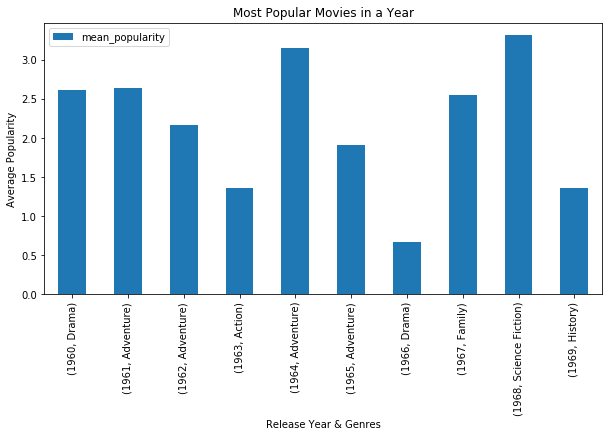

In [207]:
popularity_year.iloc[0:10,:].plot(kind='bar', subplots=True, figsize=(10,5))
plt.ylabel('Average Popularity')
plt.xlabel('Release Year & Genres')
plt.title('Most Popular Movies in a Year')

N.B.: In 1969, History movies were the most popular but this may be a hasty conclusion considering only 17 movies were used across all the years.

Text(0.5,1,'Most Popular Movies in a Year')

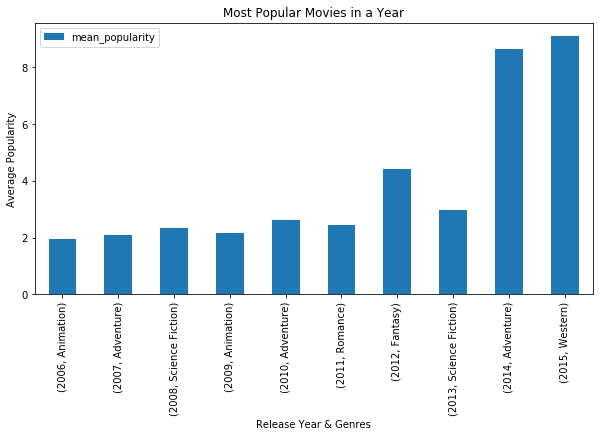

In [208]:
popularity_year.iloc[len(popularity_year)-10:len(popularity_year),:].plot(kind='bar', subplots=True, figsize=(10,5))
plt.ylabel('Average Popularity')
plt.xlabel('Release Year & Genres')
plt.title('Most Popular Movies in a Year')

N.B.: In 2015, Western movies were the most popular but this may be a hasty conclusion considering only 16 movies were used across all the years. 

### Average Number of Votes Over the Years

We will now analyse the average number of votes over the years and see if a trend can be associated with popularity. First we shall define a function to calculate the Pearson Correlation Coefficient ([click here](http://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/) for more information)

In [209]:
# define a function that takes two series as arguments and returns the correlation between the two series

def correlation(series_1, series_2):
    corr_result=series_1.corr(series_2)
    return corr_result

In [210]:
# group data with respect to release year 

GroupMean_by_ReleaseYear=movie_database_analysis_df.groupby(['release_year'], as_index=False).mean()

In [211]:
# apply correlation function between release year and average vote count

print ("Pearson r between release year and average vote count:")
correlation(GroupMean_by_ReleaseYear.loc[:,'release_year'], GroupMean_by_ReleaseYear.loc[:,'vote_count'])

Pearson r between release year and average vote count:


0.68911914156888621

There is a strong correlation between when a movie was released and the number of votes it received for its rating. We will plot this correlation for better visual understanding.

Text(0.5,1,'Average Vote Count Over Time')

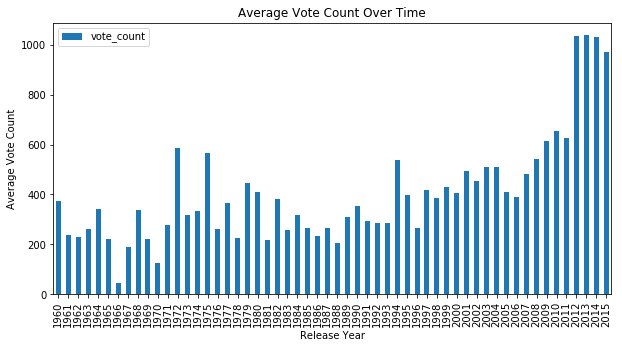

In [212]:
GroupMean_by_ReleaseYear.plot(kind='bar', figsize=(10,5), x='release_year', y='vote_count')
plt.ylabel('Average Vote Count')
plt.xlabel('Release Year')
plt.title('Average Vote Count Over Time')

Looking at the graph, we can see that it's really in the last ~20 years that a sharp spark in vote counts vs release years can clearly be seen. The only data available that may explain this trend (mind you, this is based on my assumption) could be due to increased popularity of movies over the years and thus more vote count? Let's explore that theory.

### Level of Popularity Over Time

In [213]:
# apply correlation function between average popularity and release year

print ("Pearson r between popularity and release year:")
correlation(GroupMean_by_ReleaseYear.loc[:,'popularity'], GroupMean_by_ReleaseYear.loc[:,'release_year'])

Pearson r between popularity and release year:


0.39005312637470213

The correlation in this case is weak but it is there, the level of popularity for movies tend to increase over time. I would speculate, beyond the scope of available analysis that other reasons may be that tmdb.com istself did not become a prevalent go to for movie amateurs until recently. So maybe people started voting on tmdb when they joined tmdb which would have been in 2008 when tmdb was created. Aslo the demographic most likely to join tmdb are on the younger side of things and maybe wouldn't want to necessarily watch a movie from the 60s? Take myself for example, I've been a member of imdb (not tmdb...) for 12 years now and have over 1000 votes for various tv shows and movies, most of them starting from the 80s. I don't really watch movies that are before the 80s simply because I don't want to! So maybe many millenials and generation Zs might feel the same way?

Also a young individual in their 20s during the 60s that would've watched the "popular" movies from back then would be in their 60s/70s today. Would older people really bother going to tmdb and cast a vote on all the popular movies from their young days? Not so sure that they would...

Obviously, this analysis is very subjective to my views so take it with a grain of salt, but there might be some truths in all that analysis...

One area I do expect to see strong correlation is the higher the popularity, the higher the vote count as more people would've seen it and thus potentially the higher popularity.

### Popularity vs Number of Votes?

In [214]:
# apply correlation function between popularity and number of votes

print ("Pearson r between popularity and number of votes:")
correlation(movie_database_analysis_df.loc[:,'popularity'], movie_database_analysis_df.loc[:,'vote_count'])

Pearson r between popularity and number of votes:


0.77844919469217655

Very stong correlation between popularity and vote count. The higher the popularity, the higher the vote count. Here are a few popular movies from the 60s and in the last 10 years (from 2006 to 2015)

In [215]:
print("Most popular movies from the 60s:")

movie_database_analysis_df[movie_database_analysis_df['release_year']<1970].nlargest(10, 'popularity')

Most popular movies from the 60s:


,imdb_id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,director,cast,genres,production_companies,ROI(%)
3520,tt0062622,3.309196,2001: A Space Odyssey,149,4/5/68,1708,7.7,1968,7.522756e+07,3.555466e+08,Stanley Kubrick,Keir Dullea,Science Fiction,Stanley Kubrick Productions,472.628092
3551,tt0055928,3.170651,Dr. No,110,10/4/62,560,6.7,1962,7.929294e+06,4.296236e+08,Terence Young,Sean Connery,Adventure,Eon Productions,5418.181818
3558,tt0058150,3.153791,Goldfinger,110,9/17/64,602,7.0,1964,2.460594e+07,8.780804e+08,Guy Hamilton,Sean Connery,Adventure,Eon Productions,3568.571429
3631,tt0055254,2.631987,One Hundred and One Dalmatians,79,1/25/61,913,6.6,1961,2.917944e+07,1.574815e+09,Clyde Geronimi,Rod Taylor,Adventure,Walt Disney Productions,5397.000350
3641,tt0054215,2.610362,Psycho,109,8/14/60,1180,8.0,1960,5.949601e+06,2.359350e+08,Alfred Hitchcock,Anthony Perkins,Drama,Shamley Productions,3965.559119
3733,tt0061852,2.550704,The Jungle Book,78,10/18/67,928,7.0,1967,2.614705e+07,1.345551e+09,Wolfgang Reitherman,Phil Harris,Family,Walt Disney Pictures,5146.090300
3746,tt0057076,2.508235,From Russia With Love,115,10/11/63,458,6.7,1963,1.780045e+07,5.617734e+08,Terence Young,Sean Connery,Action,Eon Productions,3155.950600
3734,tt0061722,2.227230,The Graduate,106,12/21/67,426,7.5,1967,1.961029e+07,6.824192e+08,Mike Nichols,Anne Bancroft,Comedy,Embassy Pictures Corporation,3479.903400
3559,tt0057012,2.210475,Dr. Strangelove or: How I Learned to Stop Worr...,95,1/29/64,804,7.7,1964,1.265448e+07,6.636764e+07,Stanley Kubrick,Peter Sellers,Drama,Hawk Films,524.459556
3560,tt0058331,1.987819,Mary Poppins,139,8/27/64,613,7.2,1964,4.218160e+07,7.190046e+08,Robert Stevenson,Julie Andrews,Comedy,Walt Disney Productions,1704.545450


So the table above presents a few movies that were extremely popular in the 60s, and although I previously mentioned that I don't typically watch movies from that era, one of my all time favourite Bond movies starring Sean Connery, Goldfindger, is one of my all time favourite. I actually just gave it a vote on my account (9/10) as I realized that I didn't vote for it! But that's the only movie I recall having seen from that list.

In [216]:
print ("Most popular movies from the 2006 to 2015:")

movie_database_analysis_df[movie_database_analysis_df['release_year']>=2005].nlargest(10, 'popularity')

Most popular movies from the 2006 to 2015:


,imdb_id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,director,cast,genres,production_companies,ROI(%)
0,tt0369610,32.985763,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Colin Trevorrow,Chris Pratt,Action,Universal Studios,1009.019207
1,tt1392190,28.419936,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,George Miller,Tom Hardy,Action,Village Roadshow Pictures,252.290903
160,tt0816692,24.949134,Interstellar,169,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08,Christopher Nolan,Matthew McConaughey,Adventure,Paramount Pictures,376.819685
161,tt2015381,14.311205,Guardians of the Galaxy,121,7/30/14,5612,7.9,2014,1.565855e+08,7.122911e+08,James Gunn,Chris Pratt,Action,Marvel Studios,454.889646
2,tt2908446,13.112507,Insurgent,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Robert Schwentke,Shailene Woodley,Adventure,Summit Entertainment,268.398365
162,tt1843866,12.971027,Captain America: The Winter Soldier,136,3/20/14,3848,7.6,2014,1.565855e+08,6.583651e+08,Joe Russo,Chris Evans,Action,Marvel Studios,420.450925
163,tt2911666,11.422751,John Wick,101,10/22/14,2712,7.0,2014,1.842182e+07,7.252661e+07,Chad Stahelski,Keanu Reeves,Action,Thunder Road Pictures,393.699485
3,tt2488496,11.173104,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,J.J. Abrams,Harrison Ford,Action,Lucasfilm,1034.089113
164,tt1951265,10.739009,The Hunger Games: Mockingjay - Part 1,123,11/18/14,3590,6.6,2014,1.151364e+08,6.927528e+08,Francis Lawrence,Jennifer Lawrence,Science Fiction,Lionsgate,601.680183
165,tt2310332,10.174599,The Hobbit: The Battle of the Five Armies,144,12/10/14,3110,7.1,2014,2.302728e+08,8.797523e+08,Peter Jackson,Martin Freeman,Adventure,WingNut Films,382.047915


So the above table shows the most popular movies in the "last 10 years" and contrary to the 60s movies, I have watched all of them and casted a vote (even reviews in some cases) for all of them on IMDB. 

### Popularity vs Movie Rating?

In [217]:
# apply correlation function between popularity and average vote

print ("Pearson r between popularity and movie rating:")
correlation(movie_database_analysis_df.loc[:,'popularity'], movie_database_analysis_df.loc[:,'vote_average'])

Pearson r between popularity and movie rating:


0.32085317433636756

A weak correlation between popularity and vote average so I would approach the following statement with caution: the more popular the movie the higher the average vote. 

## The Money Interaction

We will now approach the analysis in terms of any potential relationships between budget, revenue, ROI, popularity, average vote, etc.

### Budget vs Popularity?

In [218]:
# apply correlation function between budget and popularity?

print ("Pearson r between budget and popularity:")
correlation(movie_database_analysis_df.loc[:,'budget_adj'], movie_database_analysis_df.loc[:, 'popularity'])

Pearson r between budget and popularity:


0.39264368058292709

Although it is a moderately weak correlation, one can tentatively say that the higher the budget the more popular a movie is expected to be which would make a little sense since bigger budget movies would have more money to spend on marketing

Let's analyse which movies tend to have the higher revenues. I would think that the more popular a movie is, the higher the revenue and also the higher the budget, the higher the revenue. Let's find out!

### Revenue vs Popularity and Revenue vs Budget

In [219]:
# apply correlation function between revenue and popularity

print ("Pearson r between revenue and popularity:")
correlation(movie_database_analysis_df.loc[:,'popularity'], movie_database_analysis_df.loc[:,'revenue_adj'])

Pearson r between revenue and popularity:


0.54314558887810416

The correlation is not as strong as I would've expected, but there's definitely a moderate strong correlation whereby, the more popular a movie, the more revenue it generates. How about budget? 

In [220]:
# apply correlation function between revenue and budget

print ("Pearson r between revenue and budget:")
correlation(movie_database_analysis_df.loc[:,'budget_adj'], movie_database_analysis_df.loc[:,'revenue_adj'])

Pearson r between revenue and budget:


0.5660633978477404

Very similar result to that of popularity. So one can tentatively conclude, that the higher the budget and popularity of a 
given movie, the higher chances there are that more revenue will be generated. However, I feel that this conclusion is a bit decieving. As a symbolic example, a movie that has a budget of \$100,000 would more easily generate a revenue of \$1,000 than say the movie that has a budget of $1,000. This is where the return on investment - ROI - allows us to compare apples to apples.

### ROI vs Popularity and ROI vs Budget?

In [221]:
# apply correlation function between ROI and popularity

print ("Pearson r between ROI and popularity:")
correlation(movie_database_analysis_df.loc[:,'ROI(%)'], movie_database_analysis_df.loc[:,'popularity'])

Pearson r between ROI and popularity:


-0.00025955052307979882

In [222]:
# apply correlation function between ROI and budget

print ("Pearson r between ROI and budget:")
correlation(movie_database_analysis_df.loc[:,'ROI(%)'], movie_database_analysis_df.loc[:,'budget_adj'])

Pearson r between ROI and budget:


-0.031010018809531161

The results now are very different from the revenue standpoint, there's no correlation between popularity or budget with respect to ROI. In fact, the more money one spends on a movie doesn't necessarily mean better returns! It is also interesting to see that although no correlation exists, there is a negative sign correlation between ROI and budget...

### Movie Genres with Respect to Budget & Revenue

In [223]:
# first create a datafram from grouping movie genres and get the mean of the desired metrics

GroupMean_by_Genres=movie_database_analysis_df.groupby(['genres'], as_index=False).mean().filter(['genres','budget_adj',
                                                                                                  'revenue_adj', 'ROI(%)'], axis=1 )

print ("Sample of average revenue, budget and ROI for a given genre:")  
GroupMean_by_Genres.head()

Sample of average revenue, budget and ROI for a given genre:


,genres,budget_adj,revenue_adj,ROI(%)
0,Action,6.205175e+07,1.655522e+08,277.638433
1,Adventure,8.701332e+07,3.071605e+08,515.384002
2,Animation,8.701574e+07,3.042106e+08,354.449624
3,Comedy,3.179032e+07,1.034974e+08,554.734239
4,Crime,3.190884e+07,9.936426e+07,420.655381


To that table, we will add a standarized column for budget, revenue and ROI for ease of analysis.

In [224]:
# define a function to standarize a column. takes in a column and returns the standarized value for each variable of the column

def standarize_column(column):
    return (column-column.mean())/column.std()

In [225]:
# add standarized columns to GroupMean_by_Genres

GroupMean_by_Genres['budget_std']=standarize_column(GroupMean_by_Genres.loc[:,'budget_adj'])
GroupMean_by_Genres['revenue_std']=standarize_column(GroupMean_by_Genres.loc[:,'revenue_adj'])
GroupMean_by_Genres['ROI_std']=standarize_column(GroupMean_by_Genres.loc[:,'ROI(%)'])

print ("Sample of previous table with standarized columns:")
GroupMean_by_Genres.head()

Sample of previous table with standarized columns:


,genres,budget_adj,revenue_adj,ROI(%),budget_std,revenue_std,ROI_std
0,Action,6.205175e+07,1.655522e+08,277.638433,0.641849,0.224196,-0.373975
1,Adventure,8.701332e+07,3.071605e+08,515.384002,1.694101,1.983606,-0.263902
2,Animation,8.701574e+07,3.042106e+08,354.449624,1.694203,1.946955,-0.338413
3,Comedy,3.179032e+07,1.034974e+08,554.734239,-0.633818,-0.546802,-0.245683
4,Crime,3.190884e+07,9.936426e+07,420.655381,-0.628822,-0.598154,-0.307760


Based on the previous correlations explored, we know that to some extent and "with everything else being equal", the higher the budget, the higher the revenue. Let's find out the genres that command the highest budgets and the ones that command the lowest.

In [226]:
Top_Genres_Budget=GroupMean_by_Genres.nlargest(3,'budget_adj')
Bottom_Genres_Budget=GroupMean_by_Genres.nsmallest(3,'budget_adj')

print ("Top Genres as per budget & revenue:")
print (Top_Genres_Budget.filter(['genres','budget_std','revenue_std']))
print ("\n\n")
print ("Bottom Genres as per budget & revenue:")
print (Bottom_Genres_Budget.filter(['genres','budget_std','revenue_std']))

Top Genres as per budget & revenue:
      genres  budget_std  revenue_std
2  Animation    1.694203     1.946955
1  Adventure    1.694101     1.983606
7     Family    0.869359     1.557205



Bottom Genres as per budget & revenue:
         genres  budget_std  revenue_std
5   Documentary   -1.713645    -1.451650
15     TV Movie   -1.680914    -1.107249
10       Horror   -1.143233    -0.839105


The Animation/Adventure genre seems to command the highest budget and revenue while the Documentary genre seems to command the exact opposite (as the standard deviation shows). Also keep in mind that we only have one movie used for TV Movie so one should not consider TV Movie in the above list for analysis. And what about the genre that commands the highest ROI? The lowest ROI?

### Movie Genres with Respect to ROI

In [227]:
Top_Genres_ROI=GroupMean_by_Genres.nlargest(3,'ROI(%)')
Bottom_Genres_ROI=GroupMean_by_Genres.nsmallest(3,'ROI(%)')

print ("Top Genres as per ROI:")
print (Top_Genres_ROI.filter(['genres','ROI', 'ROI_std']))
print ("\n\n")
print ("Bottom Genres as per ROI:")
print (Bottom_Genres_ROI.filter(['genres','ROI','ROI_std']))

Top Genres as per ROI:
             genres   ROI_std
10           Horror  3.963587
5       Documentary  0.854933
14  Science Fiction  0.050576



Bottom Genres as per ROI:
     genres   ROI_std
17      War -0.413178
18  Western -0.399630
0    Action -0.373975


As mentioned before,the TV Movie genre will not be considered due to lack of data. The action genre seems to command the highest ROI while the Science Fiction genre seems to command the lowest ROI (as the standard deviation shows) if we ignore the TV Movie genre. It is interesting to note that although Documentaries have the lowest budgets and lowest revenues, Documentaries are among the genres with the ROIs! Let's find out which Action movies have the highest ROIs and which Science Fiction movies have the worst.

In [228]:
Action_df=movie_database_analysis_df[movie_database_analysis_df['genres'].str.contains("Action")]

print ("Top 10 movies with very high ROIs:")
Action_df.nlargest(10,'ROI(%)')

Top 10 movies with very high ROIs:


,imdb_id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,director,cast,genres,production_companies,ROI(%)
3577,tt0067927,0.275523,Vanishing Point,99,1/15/71,48,7.1,1971,7.000753e+06,3.891681e+08,Richard C. Sarafian,Barry Newman,Action,Twentieth Century Fox Film Corporation,5558.946615
3746,tt0057076,2.508235,From Russia With Love,115,10/11/63,458,6.7,1963,1.780045e+07,5.617734e+08,Terence Young,Sean Connery,Action,Eon Productions,3155.950600
3572,tt0067116,0.604241,The French Connection,104,10/9/71,201,7.0,1971,9.693351e+06,2.216479e+08,William Friedkin,Gene Hackman,Action,D'Antoni Productions,2286.597611
2774,tt0086960,2.108338,Beverly Hills Cop,105,11/30/84,535,6.5,1984,3.148563e+07,6.640539e+08,Martin Brest,Eddie Murphy,Action,Paramount Pictures,2109.069853
3335,tt0097138,0.914399,Cyborg,86,4/7/89,73,4.8,1989,8.794925e+05,1.788265e+07,Albert Pyun,Jean-Claude Van Damme,Action,Cannon Group,2033.291800
1065,tt1101026,0.427023,ÐÐ´Ð¼Ð¸Ñ€Ð°Ð»ÑŠ,123,6/6/08,28,6.7,2008,2.025573e+06,3.862351e+07,Andrey Kravchuk,Konstantin Khabenskiy,Action,Film Direction,1906.793900
2564,tt0068638,0.260584,The Getaway,118,12/13/72,42,7.2,1972,1.748053e+07,3.067830e+08,Sam Peckinpah,Steve McQueen,Action,First Artists,1754.998189
2563,tt0069113,0.321141,The Poseidon Adventure,117,12/1/72,144,7.7,1972,2.607280e+07,4.409595e+08,Ronald Neame,Gene Hackman,Action,Twentieth Century Fox Film Corporation,1691.262360
3536,tt0071110,0.463337,Airport 1975,107,10/18/74,30,6.1,1974,1.326685e+07,2.078473e+08,Jack Smight,Charlton Heston,Action,Universal Pictures,1566.666667
3487,tt0092644,1.074670,Beverly Hills Cop II,100,5/18/87,333,6.1,1987,3.838161e+07,5.756570e+08,Tony Scott,Eddie Murphy,Action,Paramount Pictures,1499.825180


I must admit that I'm not too familiar with many of these movies (most them being prior 1980) but I do recognize the Beverly Hill Cop Triology with the very talend Eddie Murphy. Grew up loving those movies!

In [229]:
ScienceFiction_df=movie_database_analysis_df[movie_database_analysis_df['genres'].str.contains("Science Fiction")]

print ("Bottom 10 movies with very low ROIs:")
ScienceFiction_df.nsmallest(10,'ROI(%)')

Bottom 10 movies with very low ROIs:


,imdb_id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,director,cast,genres,production_companies,ROI(%)
3382,tt0103060,0.799449,Teenage Mutant Ninja Turtles II: The Secret of...,88,3/22/91,161,6.0,1991,4.002732e+07,1.248852e+02,Michael Pressman,Paige Turco,Science Fiction,New Line Cinema,0.000312
3504,tt0092746,0.447184,Cherry 2000,99,11/12/87,35,6.0,1987,1.919080e+07,2.686713e+04,Steve De Jarnatt,Melanie Griffith,Science Fiction,ERP Productions,0.140000
1293,tt1535616,0.189663,The Divide,112,3/13/11,86,5.6,2011,2.908194e+06,2.132676e+04,Xavier Gens,Lauren German,Science Fiction,Instinctive Film,0.733333
389,tt0485947,1.260010,Mr. Nobody,141,9/11/09,827,7.8,2009,4.777082e+07,3.605385e+06,Jaco Van Dormael,Jared Leto,Science Fiction,Pan EuropÃ©enne Production,7.547253
1842,tt0120207,0.345909,Steel,97,8/15/97,19,4.3,1997,2.173537e+07,2.290947e+06,Kenneth Johnson,Shaquille O'Neal,Science Fiction,Warner Bros. Pictures,10.540181
3170,tt0134983,0.385350,Supernova,91,1/14/00,42,4.7,2000,1.139663e+08,1.877668e+07,Walter Hill,James Spader,Science Fiction,United Artists,16.475646
3250,tt0120184,1.152417,Sphere,134,2/13/98,238,5.6,1998,1.003272e+08,1.752381e+07,Barry Levinson,Dustin Hoffman,Science Fiction,Punch Productions,17.466667
2672,tt0427392,0.726521,The Invasion,99,8/17/07,156,5.4,2007,8.413349e+07,1.585024e+07,Oliver Hirschbiegel,Nicole Kidman,Science Fiction,Village Roadshow Pictures,18.839393
3792,tt0091472,0.277984,The Manhattan Project,118,6/13/86,11,6.0,1986,3.580932e+07,7.758685e+06,Marshall Brickman,John Lithgow,Science Fiction,Gladden Entertainment,21.666667
3347,tt0097889,0.481276,Miracle Mile,87,5/19/89,19,6.9,1989,5.276955e+06,2.014748e+06,Steve De Jarnatt,Anthony Edwards,Science Fiction,Hemdale Film,38.180133


I haven't seen any movies on that list and contrary to the previous list, all of these movies are past 1980 (maybe why they have such a bad ROI...).

### Impact of Budget & Popularity on Revenue

In [230]:
Groupby_BudgetPopularity=pd.DataFrame({'mean_revenue':movie_database_analysis_df.groupby(['popularity','budget_adj'])['revenue_adj'].mean()}).reset_index()


print ("Sample of grouped popularity & budget with respect to revenue:")
Groupby_BudgetPopularity.head()

Sample of grouped popularity & budget with respect to revenue:


,popularity,budget_adj,mean_revenue
0,0.010335,2.808100e+07,6.377150e+07
1,0.015727,3.283968e+07,3.612365e+07
2,0.015997,1.899438e+07,6.606877e+06
3,0.017498,1.341094e+08,1.353482e+08
4,0.021371,3.544753e+06,7.798457e+06


In [231]:
# correlation between popularity, budget and revenue

print ("Pearson r between popularity, budget and revenue:")
Groupby_BudgetPopularity.corr()

Pearson r between popularity, budget and revenue:


,popularity,budget_adj,mean_revenue
popularity,1.000000,0.392644,0.543146
budget_adj,0.392644,1.000000,0.566063
mean_revenue,0.543146,0.566063,1.000000


In [232]:
# add standarized columns

Groupby_BudgetPopularity['popularity_std']=standarize_column(Groupby_BudgetPopularity.loc[:,'popularity'])
Groupby_BudgetPopularity['budget_adj_std']=standarize_column(Groupby_BudgetPopularity.loc[:,'budget_adj'])
Groupby_BudgetPopularity['mean_revenue_std']=standarize_column(Groupby_BudgetPopularity.loc[:,'mean_revenue'])

print ("Sample of grouped popularity & budget with standarized columns:")
Groupby_BudgetPopularity.head()

Sample of grouped popularity & budget with standarized columns:


,popularity,budget_adj,mean_revenue,popularity_std,budget_adj_std,mean_revenue_std
0,0.010335,2.808100e+07,6.377150e+07,-0.809822,-0.379753,-0.350968
1,0.015727,3.283968e+07,3.612365e+07,-0.806194,-0.273911,-0.477881
2,0.015997,1.899438e+07,6.606877e+06,-0.806012,-0.581857,-0.613374
3,0.017498,1.341094e+08,1.353482e+08,-0.805002,1.978525,-0.022404
4,0.021371,3.544753e+06,7.798457e+06,-0.802396,-0.925487,-0.607904


Let's now plot the relationship between these three variables in terms of standard deviation as it will be easier to fit them in the same plot.

Text(0.5,1,'Relationship between popularity, budget with respect to biggest movie revenues')

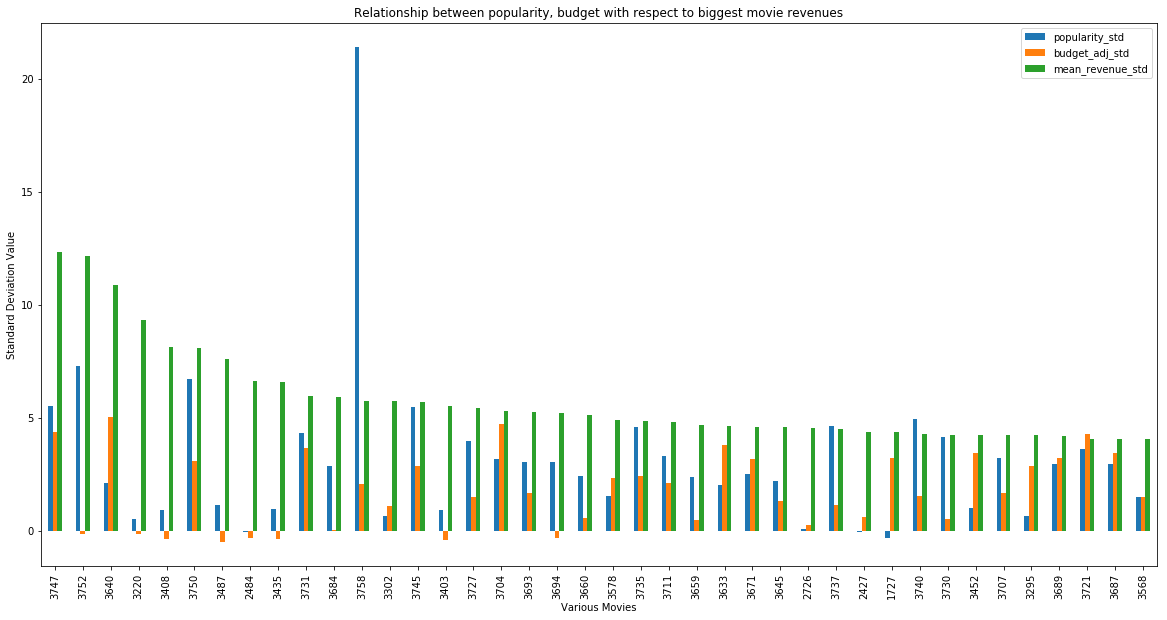

In [233]:
# plot the biggest revenues

Groupby_BudgetPopularity.nlargest(40,'mean_revenue_std').filter(['popularity_std','budget_adj_std','mean_revenue_std']).plot.bar(figsize=(20,10))
plt.ylabel('Standard Deviation Value')
plt.xlabel('Various Movies')
plt.title('Relationship between popularity, budget with respect to biggest movie revenues')

Text(0.5,1,'Relationship between popularity, budget with respect to smallest movie revenues')

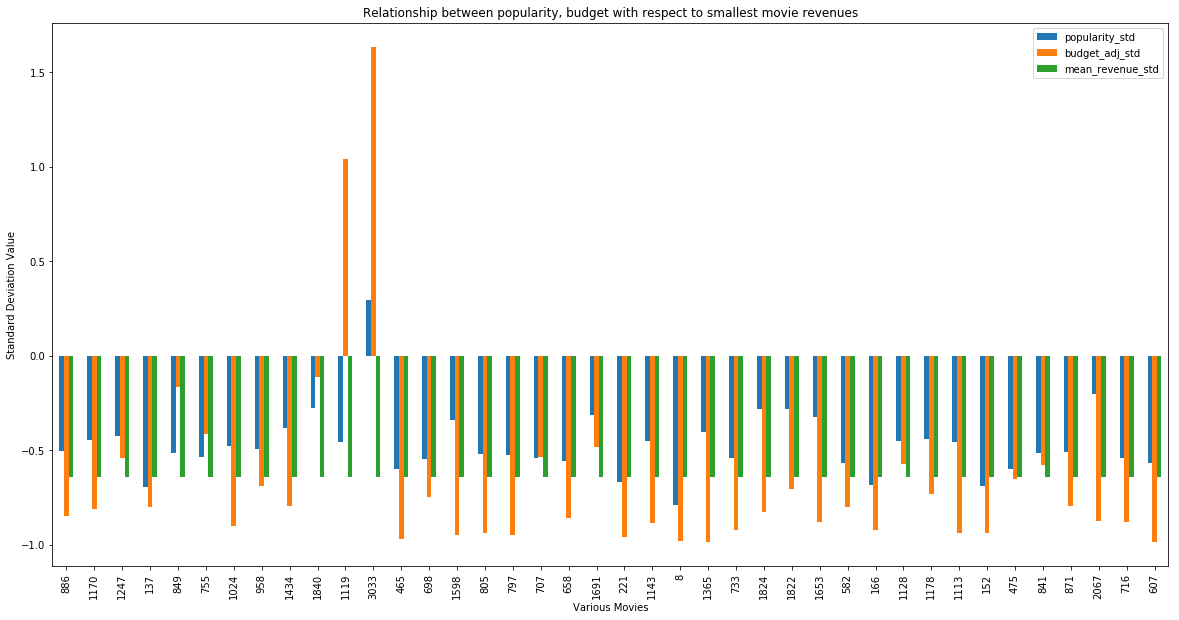

In [234]:
Groupby_BudgetPopularity.nsmallest(40,'mean_revenue_std').filter(['popularity_std','budget_adj_std','mean_revenue_std']).plot.bar(figsize=(20,10))
plt.ylabel('Standard Deviation Value')
plt.xlabel('Various Movies')
plt.title('Relationship between popularity, budget with respect to smallest movie revenues')

The two previous plot confirm the correlation. In general, if the budget and popularity standard deviations are positive (i.e.:higher than the average) it translates into higher revenues. If on the other hand, budget and popularity standard deviations are negative (i.e.: lower than the average) it translates into lower revenues.

## The Production Company Interaction

Next we will do an analysis with respect to production companies which includes the number of movies made, the popularity and average rating, best ROIs etc.

### Number of Movies Made by Production Companies

In [235]:
# find out the number of movies produced by production companies

production_companies_count=movie_database_analysis_df['production_companies'].value_counts()

print ("Top 10 production companies in terms of number of movies made:")
production_companies_count.iloc[0:10]

Top 10 production companies in terms of number of movies made:


Universal Pictures                        282
Paramount Pictures                        261
Columbia Pictures                         175
Twentieth Century Fox Film Corporation    163
New Line Cinema                           141
Walt Disney Pictures                      117
Miramax Films                              76
Warner Bros.                               74
Village Roadshow Pictures                  66
Columbia Pictures Corporation              65
Name: production_companies, dtype: int64

Unsurprisingly to the movie amateur, the big producing companies are some very well knowns names such as Universal Pictures, Twentieth Century Fox Film Corp or Walt Disney Pictures. For our analysis, we will only consider production companies that have made at least 10 movies.

In [236]:
# list of production companies that have made at least 10 movies since 1960

production_companies_10=production_companies_count[production_companies_count>=10]
production_companies_10=production_companies_10.index.values

In [237]:
# create a dataframe of production companies with at least 10 movies

production_companies_df=movie_database_analysis_df[movie_database_analysis_df['production_companies']
                                                   .isin(production_companies_10)]

In [238]:
# create dataframe grouped by production companies and get the mean for various metrics

Groupby_ProductionCompanies=production_companies_df.groupby(['production_companies'], as_index=False).mean().drop(['release_year','runtime',
                                                                                                   'vote_count'],1)

print ("Sample of production companies dataframe with the mean average of various metric: ")
Groupby_ProductionCompanies.head()

Sample of production companies dataframe with the mean average of various metric: 


,production_companies,popularity,vote_average,budget_adj,revenue_adj,ROI(%)
0,20th Century Fox,0.692351,5.871053,4.582774e+07,1.072559e+08,485.188822
1,Alcon Entertainment,1.187149,6.250000,4.373326e+07,9.491422e+07,243.108080
2,Amblin Entertainment,1.595552,6.561538,8.215318e+07,3.258496e+08,494.792867
3,American Zoetrope,0.759980,6.366667,2.981628e+07,8.032237e+07,423.589242
4,BBC Films,0.720756,6.309524,1.219228e+07,3.138219e+07,360.598104


In [239]:
#let's standarize the above table table

Groupby_ProductionCompanies['popularity_std']=standarize_column(Groupby_ProductionCompanies.loc[:,'popularity'])
Groupby_ProductionCompanies['vote_average_std']=standarize_column(Groupby_ProductionCompanies.loc[:,'vote_average'])
Groupby_ProductionCompanies['budget_std']=standarize_column(Groupby_ProductionCompanies.loc[:,'budget_adj'])
Groupby_ProductionCompanies['revenue_std']=standarize_column(Groupby_ProductionCompanies.loc[:,'revenue_adj'])
Groupby_ProductionCompanies['ROI_std']=standarize_column(Groupby_ProductionCompanies.loc[:,'ROI(%)'])

print ("Sample of production companies dataframe with standarized columns: ")
Groupby_ProductionCompanies.head()

Sample of production companies dataframe with standarized columns: 


,production_companies,popularity,vote_average,budget_adj,revenue_adj,ROI(%),popularity_std,vote_average_std,budget_std,revenue_std,ROI_std
0,20th Century Fox,0.692351,5.871053,4.582774e+07,1.072559e+08,485.188822,-0.724967,-0.924870,-0.317183,-0.463005,0.153841
1,Alcon Entertainment,1.187149,6.250000,4.373326e+07,9.491422e+07,243.108080,-0.280833,0.170691,-0.381831,-0.529453,-0.539296
2,Amblin Entertainment,1.595552,6.561538,8.215318e+07,3.258496e+08,494.792867,0.085752,1.071369,0.804036,0.713902,0.181340
3,American Zoetrope,0.759980,6.366667,2.981628e+07,8.032237e+07,423.589242,-0.664263,0.507982,-0.811391,-0.608015,-0.022534
4,BBC Films,0.720756,6.309524,1.219228e+07,3.138219e+07,360.598104,-0.699471,0.342778,-1.355373,-0.871509,-0.202893


### Popularity vs Rating with respect to Grouped Production Companies

In [240]:
# apply correlation function between average popularity and average rating with respect to grouped production companies:

print ("Pearson r between average popularity and average rating for grouped production coompanies:")
correlation(Groupby_ProductionCompanies.loc[:,'popularity'], Groupby_ProductionCompanies.loc[:,'vote_average'])

Pearson r between average popularity and average rating for grouped production coompanies:


0.65100755452765469

Remember previously we attempted to verify the correlation between popularity and average vote but there was no strong correlation. However if we group production companies and verify the same correlation, we now see that a close to strong correlation exists between average popularity and average vote. One can tentatively derive that for a given production company, the higher the average popularity the higher the average rating. Let's print some of top production companies in terms of average popularity.

In [241]:
print("Most popular production movie companies:")

Sorted_ProductionCompanies_pop=Groupby_ProductionCompanies.sort_values(by='popularity', ascending=False).filter(['production_companies',
                                                                                                                'popularity', 'vote_average', 'popularity_std','vote_average_std'])
Sorted_ProductionCompanies_pop.head()

Most popular production movie companies:


,production_companies,popularity,vote_average,popularity_std,vote_average_std
25,Marvel Studios,7.205610,7.072727,5.121374,2.549249
49,WingNut Films,4.329096,7.141667,2.539398,2.748557
24,Lucasfilm,4.050399,6.960000,2.289237,2.223347
21,Legendary Pictures,2.756344,6.383333,1.127685,0.556166
12,Eon Productions,2.141636,6.176190,0.575920,-0.042697


From the above, we can see that Marvel Studios is very popular among movie amateurs (well above average as per the standard deviation). Let's plot those values for better visualization!

Text(0.5,1,'Average Popularity for a Production Company')

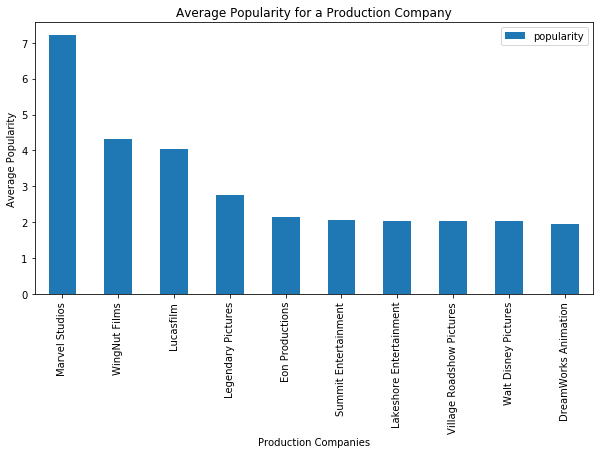

In [242]:
#In a historgram format:

Sorted_ProductionCompanies_pop.iloc[0:10,:].plot(kind='bar', figsize=(10,5), x='production_companies', y='popularity')
plt.ylabel('Average Popularity')
plt.xlabel('Production Companies')
plt.title('Average Popularity for a Production Company')

I recognize a few from this top 10 list, namely, Marvel Studios, Lucasfilm and Legendary Pictures. Marvel Studios seems to command movies with the highest popularity on average. I can already guess some of the movies from Marvel that are extremely popular, but let's still print them out to confirm :)

In [243]:
Marvel_df=production_companies_df[production_companies_df['production_companies'].isin(['Marvel Studios'])]
Marvel_df

,imdb_id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,director,cast,genres,production_companies,ROI(%)
14,tt2395427,5.944927,Avengers: Age of Ultron,141,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09,Joss Whedon,Robert Downey Jr.,Action,Marvel Studios,501.798488
17,tt0478970,5.573184,Ant-Man,115,7/14/15,3779,7.0,2015,1.195999e+08,4.771138e+08,Peyton Reed,Paul Rudd,Science Fiction,Marvel Studios,398.924741
161,tt2015381,14.311205,Guardians of the Galaxy,121,7/30/14,5612,7.9,2014,1.565855e+08,7.122911e+08,James Gunn,Chris Pratt,Action,Marvel Studios,454.889646
162,tt1843866,12.971027,Captain America: The Winter Soldier,136,3/20/14,3848,7.6,2014,1.565855e+08,6.583651e+08,Joe Russo,Chris Evans,Action,Marvel Studios,420.450925
519,tt1228705,5.704860,Iron Man 2,124,4/28/10,4920,6.6,2010,2.000000e+08,6.239333e+08,Jon Favreau,Robert Downey Jr.,Adventure,Marvel Studios,311.966666
935,tt0371746,4.977955,Iron Man,126,4/30/08,6220,7.3,2008,1.417901e+08,5.926566e+08,Jon Favreau,Robert Downey Jr.,Action,Marvel Studios,417.981587
1100,tt0458339,7.959228,Captain America: The First Avenger,124,7/22/11,5025,6.5,2011,1.357157e+08,3.592296e+08,Joe Johnston,Chris Evans,Action,Marvel Studios,264.692696
1105,tt0800369,4.123520,Thor,115,4/21/11,4485,6.5,2011,1.454097e+08,4.305242e+08,Kenneth Branagh,Chris Hemsworth,Adventure,Marvel Studios,296.076671
1488,tt0848228,7.637767,The Avengers,143,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09,Joss Whedon,Robert Downey Jr.,Science Fiction,Marvel Studios,690.708141
1859,tt1981115,5.111900,Thor: The Dark World,112,10/29/13,3025,6.8,2013,1.591257e+08,4.490760e+08,Alan Taylor,Chris Hemsworth,Action,Marvel Studios,282.214706


As I anticipated, most of the latest superhero movies are found in that list and I've seen all of them!

### Popularity vs Revenue and Average Rating vs Revenue for Grouped Production Companies?

In [244]:
print ("Pearson r between popularity and return on investment:")
correlation(Groupby_ProductionCompanies.loc[:,'popularity'], Groupby_ProductionCompanies.loc[:,'revenue_adj'])

Pearson r between popularity and return on investment:


0.8197176774671795

In [245]:
print ("Correlation between average vote and return on investment:")
correlation(Groupby_ProductionCompanies.loc[:,'vote_average'], Groupby_ProductionCompanies.loc[:,'revenue_adj'])

Correlation between average vote and return on investment:


0.63650239456545055

There is a very strong correlation between average vote / popularity and revenue for a given production company. Let's plot these to have a better visualisation.

Text(0.5,1,'Relationship between popularity, rating with respect to biggest movie revenues')

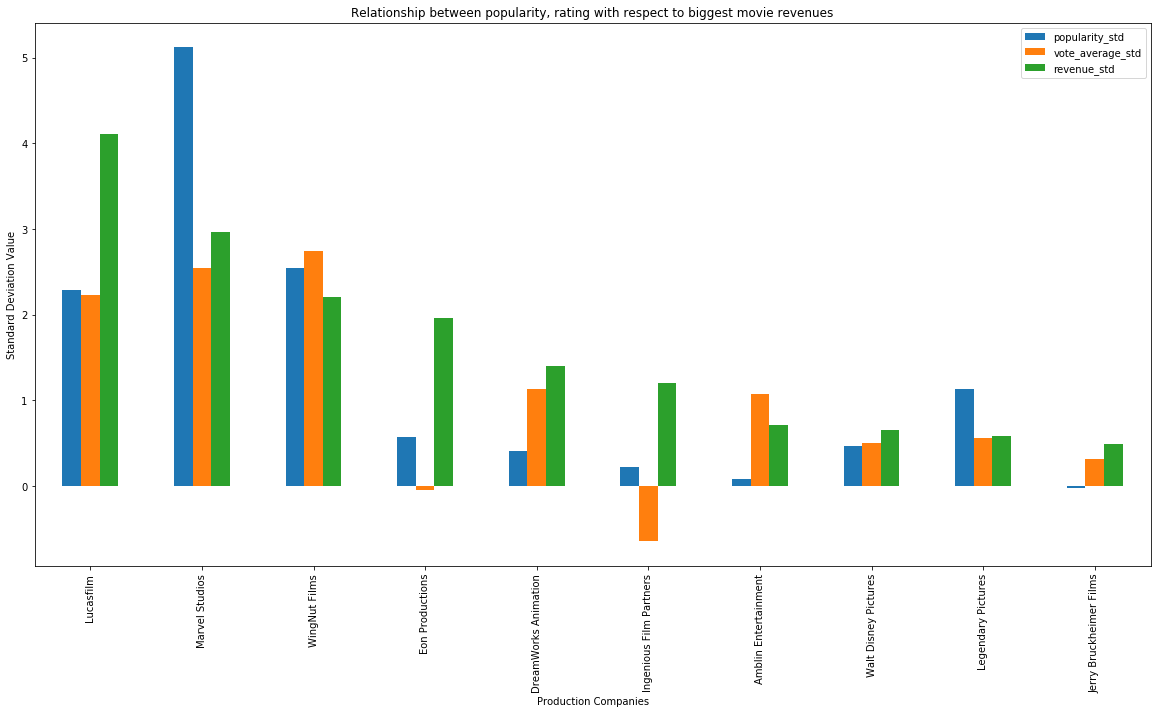

In [246]:
Groupby_ProductionCompanies.nlargest(10,'revenue_adj').plot(x='production_companies', y=['popularity_std','vote_average_std','revenue_std'],kind='bar', figsize=(20,10))
plt.ylabel('Standard Deviation Value')
plt.xlabel('Production Companies')
plt.title('Relationship between popularity, rating with respect to biggest movie revenues')

Text(0.5,1,'Relationship between popularity, rating with respect to smallest movie revenues')

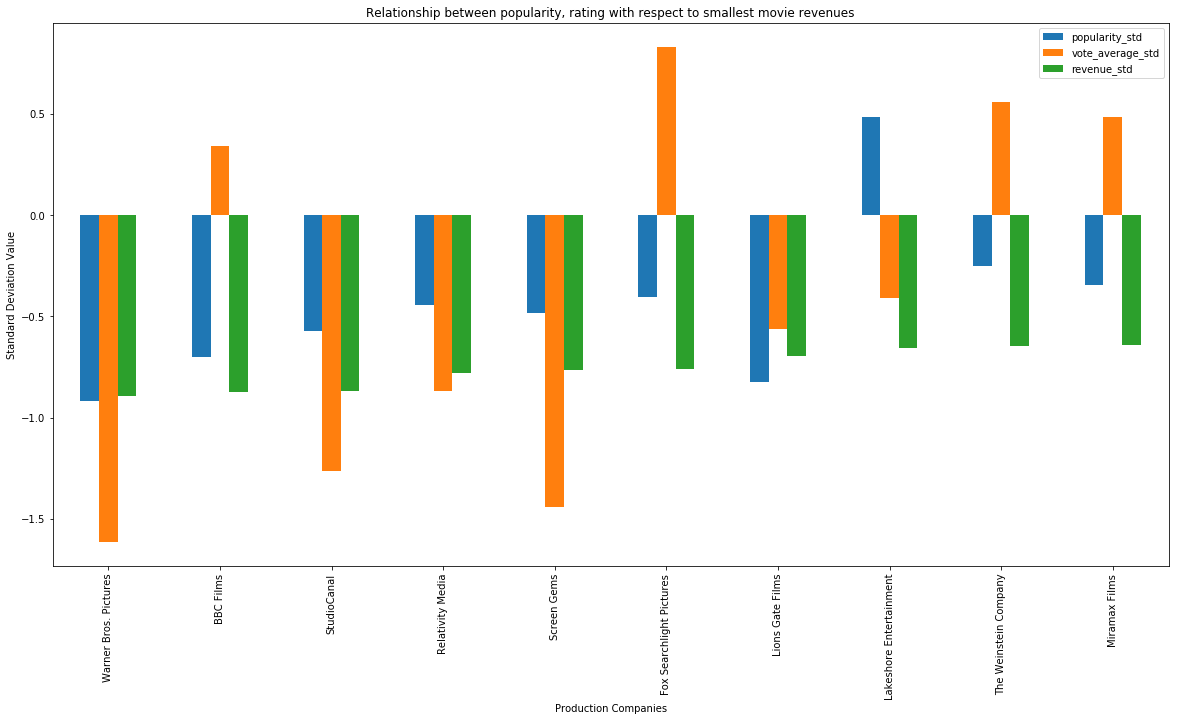

In [247]:
Groupby_ProductionCompanies.nsmallest(10,'revenue_adj').plot(x='production_companies', y=['popularity_std','vote_average_std','revenue_std'],kind='bar', figsize=(20,10))
plt.ylabel('Standard Deviation Value')
plt.xlabel('Production Companies')
plt.title('Relationship between popularity, rating with respect to smallest movie revenues')

The two previous plot confirm the correlation. In general, if the rating and popularity standard deviations are positive (i.e.:higher than the average) it translates into higher revenues. If on the other hand, rating and popularity standard deviations are negative (i.e.: lower than the average) it translates into lower revenues.

### Production Companies with Respect to Budget/Revenue

In [248]:
Top_ProductionCompanies_Budget=Groupby_ProductionCompanies.nlargest(3,'budget_adj')
Bottom_ProductionCompanies_Budget=Groupby_ProductionCompanies.nsmallest(3,'budget_adj')

print ("Top Production Companies as per budget & revenue:")
print (Top_ProductionCompanies_Budget.filter(['production_companies','budget_std','revenue_std']))
print ("\n\n")
print ("Bottom Production Companies as per budget & revenue:")
print (Bottom_ProductionCompanies_Budget.filter(['production_companies','budget_std','revenue_std']))

Top Production Companies as per budget & revenue:
    production_companies  budget_std  revenue_std
25        Marvel Studios    3.511476     2.961652
9   DreamWorks Animation    2.456670     1.394660
49         WingNut Films    1.881797     2.205238



Bottom Production Companies as per budget & revenue:
        production_companies  budget_std  revenue_std
4                  BBC Films   -1.355373    -0.871509
14  Fox Searchlight Pictures   -1.351599    -0.761010
22          Lions Gate Films   -1.188759    -0.696104


We saw previously that Marvel was very popular and in line with a previous correlation exposed, Marvel movies have the biggest budgets & revenues on average!

### Production Companies with Repect to ROI

In [249]:
print ("Production companies with highest ROIs:")

Sorted_ProductionCompanies_ROI=Groupby_ProductionCompanies.sort_values(by='ROI(%)', ascending=False)
Sorted_ProductionCompanies_ROI.head()

Production companies with highest ROIs:


,production_companies,popularity,vote_average,budget_adj,revenue_adj,ROI(%),popularity_std,vote_average_std,budget_std,revenue_std,ROI_std
24,Lucasfilm,4.050399,6.960000,8.430973e+07,9.564598e+08,2368.581839,2.289237,2.223347,0.870600,4.109105,5.546461
12,Eon Productions,2.141636,6.176190,7.946193e+07,5.583549e+08,1306.785182,0.575920,-0.042697,0.720968,1.965710,2.506274
38,Summit Entertainment,2.066031,6.214634,3.865025e+07,1.462496e+08,903.467721,0.508056,0.068446,-0.538723,-0.253063,1.351477
43,United Artists,0.864911,6.487805,3.489678e+07,1.613870e+08,863.130386,-0.570076,0.858200,-0.654577,-0.171563,1.235981
28,New Line Cinema,1.181806,6.049645,3.973770e+07,1.142999e+08,682.502306,-0.285629,-0.408547,-0.505158,-0.425080,0.718798


I think it's fair to say that many will recognize the production company that leads the pack in terms of ROI. But should our reader find themselves unaware, let's display a few notable movies coming from Lucasfilm production.

In [250]:
Lucasfilm_df=production_companies_df[production_companies_df['production_companies'].isin(['Lucasfilm'])]
Lucasfilm_df.nlargest(10,'ROI(%)')

,imdb_id,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,director,cast,genres,production_companies,ROI(%)
3807,tt0069704,0.684079,American Graffiti,110,8/1/73,145,6.5,1973,3.815971e+06,5.647834e+08,George Lucas,Richard Dreyfuss,Comedy,Lucasfilm,14800.514801
325,tt0076759,12.037933,Star Wars,121,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,George Lucas,Mark Hamill,Adventure,Lucasfilm,7049.072791
2565,tt0080684,5.488441,The Empire Strikes Back,124,1/1/80,3954,8.0,1980,4.762866e+07,1.424626e+09,Irvin Kershner,Mark Hamill,Adventure,Lucasfilm,2991.111111
2976,tt0082971,4.578300,Raiders of the Lost Ark,115,6/12/81,2506,7.5,1981,4.316743e+07,9.351169e+08,Steven Spielberg,Harrison Ford,Adventure,Lucasfilm,2166.255394
2811,tt0086190,4.828854,Return of the Jedi,135,5/23/83,3101,7.8,1983,7.082424e+07,1.253819e+09,Richard Marquand,Mark Hamill,Adventure,Lucasfilm,1770.324575
2770,tt0087469,2.556799,Indiana Jones and the Temple of Doom,118,5/23/84,1735,6.9,1984,5.877318e+07,6.989810e+08,Steven Spielberg,Harrison Ford,Adventure,Lucasfilm,1189.285714
3,tt2488496,11.173104,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,J.J. Abrams,Harrison Ford,Action,Lucasfilm,1034.089113
3317,tt0097576,3.536655,Indiana Jones and the Last Crusade,127,5/24/89,2031,7.4,1989,8.443128e+07,8.340611e+08,Steven Spielberg,Harrison Ford,Adventure,Lucasfilm,987.857929
699,tt0120915,3.526029,Star Wars: Episode I - The Phantom Menace,136,5/19/99,2823,6.3,1999,1.505411e+08,1.209981e+09,George Lucas,Liam Neeson,Adventure,Lucasfilm,803.754398
1003,tt1185834,0.900342,Star Wars: The Clone Wars,98,8/5/08,261,6.0,2008,8.608686e+06,6.915595e+07,Dave Filoni,Matt Lanter,Thriller,Lucasfilm,803.327576


I think it's fair to say that our readers will have at least heard of the hugely popular Star Wars Franchise as well as Indiana Jones. 

## Directors that command bigger revenues

In [251]:
Groupby_Directors=movie_database_analysis_df.groupby(['director']).mean()

print ("Sample table:")
Groupby_Directors.head()

Sample table:


,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,ROI(%)
director,,,,,,,,
FrÃ©dÃ©ric Jardin,0.434506,98.0,28.0,5.9,2011.0,2.423495e+06,3.255239e+03,0.134320
Aaron Blaise,1.653031,85.0,753.0,6.8,2003.0,1.185353e+08,2.963382e+02,0.000250
Aaron Seltzer,0.698297,83.0,103.0,3.9,2006.0,2.163338e+07,5.251334e+07,242.742130
Abbas Tyrewala,0.193779,155.0,18.0,6.4,2008.0,2.329409e+06,1.124193e+07,482.608696
Abe Sylvia,0.315527,90.0,36.0,6.2,2010.0,4.000000e+06,5.512500e+04,1.378125


Directors that command the highest budget:

In [252]:
print ("Top 10 Directors with highest revenues")
Groupby_Directors.nlargest(10, 'revenue_adj')

Top 10 Directors with highest revenues


,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,ROI(%)
director,,,,,,,,
Irwin Winkler,1.136610,114.000000,201.000000,5.600000,1995.000000,3.148127e+07,1.583050e+09,5028.543900
Clyde Geronimi,2.631987,79.000000,913.000000,6.600000,1961.000000,2.917944e+07,1.574815e+09,5397.000350
Richard Marquand,4.828854,135.000000,3101.000000,7.800000,1983.000000,7.082424e+07,1.253819e+09,1770.324575
Chris Buck,6.112766,102.000000,3369.000000,7.500000,2013.000000,1.404050e+08,1.192711e+09,849.479339
Kyle Balda,7.404165,91.000000,2893.000000,6.500000,2015.000000,6.807997e+07,1.064192e+09,1563.149949
George Lucas,3.910306,122.500000,2116.500000,6.700000,1987.833333,7.829333e+07,1.052320e+09,4043.393644
David Yates,5.126634,141.750000,3454.750000,7.400000,2009.250000,1.957563e+08,1.044364e+09,610.758861
Joss Whedon,4.897614,134.333333,4673.666667,7.333333,2010.666667,1.700299e+08,9.264080e+08,430.723974
James Cameron,3.559685,138.750000,2719.500000,7.100000,1994.125000,1.288303e+08,9.159026e+08,642.281273


## Conclusion

This project attempted to analysis on a limited capacity the movie data of ~4,000 movies. There were definitely some intersting trends but as mentioned throughout the project, many assumptions were made and no statistical analysis was made so the findings will remain tentative. However, readers will get a feel of some relationships that exits between different parameters such as the more popular a movie is, the more votes there will be for the rating of a given movie or that spending the big box on budget doesn't necessarily translate into better ratings!

There have been some limitations to this project. The adjusted budget and revenue to account for inflation is one of them. We don't know what inflation rate was used to arrive at those adjusted values. Was it an average based on inflation over the last 10 years? 20 years? 30 years? We don't know. Also we do not officially know how popularity was measured. As we've seen, over the years, the level of popularity increased but why is that? Are people watching more movies now than they did 40 years ago? Or is it the other way around? How exactly was popularity measured in 1960? 1970? Or any movies that date before 2008, the year tmdb was created. 

There many more different ways that the movie data can be analyzed but this is a good starting point for any movie amateur to aprreciate some of the tentative findings of this work!

## References

The following websites were used as a resource for this project:
- stackoverflow
- github
